In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
os.chdir('../../')
from src.dynamical_system.simulate_method import simulate_rk4
from src.dynamical_system.model import rossler

In [80]:
## Simulate bifurcation diagram

a, c = 0.2, 5.7
b_range = np.arange(0.6, 0.75, 0.001)

x_init, y_init, z_init = 0., 1., -1.

simulation_settings={'number of samples':None,
                     'start time':0.,
                     'ending time':2000.,
                     'time step size':0.1,}

warmup_step = 1000

y_list = []
b_list = []
for b in b_range:
    X, _ = simulate_rk4(system_model=rossler, 
                        model_params=[a, b, c], 
                        initial_state=[x_init, y_init, z_init], 
                        simulation_settings=simulation_settings,)
    y_list.append(X[warmup_step:, 1])
    b_list.append(np.full(len(X[warmup_step:, 1]), b))

In [81]:
### Get the local maxima

prominence = 1.

from scipy.signal import find_peaks

def fing_peaks_index(data, prominence):
    peaks_index, _ = find_peaks(data, prominence=prominence)
    peaks = data[peaks_index]
    return peaks, peaks_index

y_localmaxima_list = []
idx_localmaxima_list = []
b_localmaxima_list = []
for i in range(len(y_list)):
    peaks, idx = fing_peaks_index(y_list[i], prominence)
    y_localmaxima_list.append(peaks)
    idx_localmaxima_list.append(idx)
    b_localmaxima_list.append(np.full(len(peaks), b_list[i][0]))

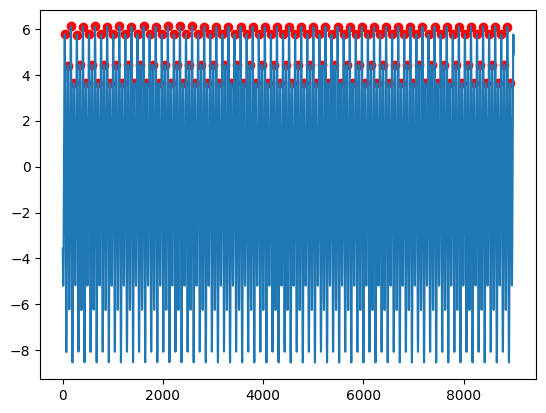

In [78]:
number = -1
plt.plot(y_list[number])
plt.scatter(idx_localmaxima_list[number], y_localmaxima_list[number], c='r')

In [66]:
import itertools

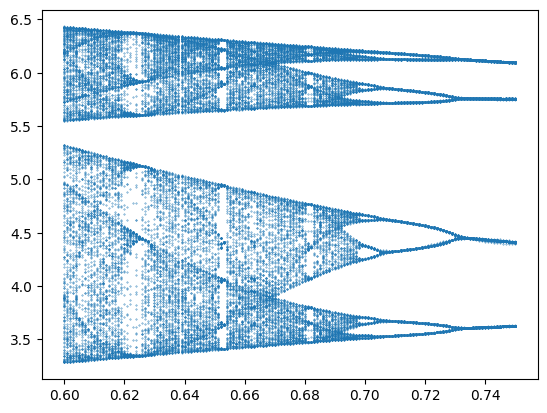

In [82]:
plt.scatter(list(itertools.chain.from_iterable(b_localmaxima_list)), list(itertools.chain.from_iterable(y_localmaxima_list)), s=0.1)